# [S202] Trabalho avaliativo 1
---  
### Desenvolvido por:
<div style="display: flex; justify-content: left;">
    <div align="center" style="width: 20%; margin: 10px;">
        <a href="https://github.com/DIEGOVZK">
            <img src="https://avatars.githubusercontent.com/u/45247817?v=4" alt="DIEGOVZK's avatar" style="border-radius:50%; width: 100%;">
            <br>
            <b style="font-size: 1.2em;">Diego Anestor Coutinho</b> <br>
            <span style="font-size: 0.8em;">diego.anestor@gec.inatel.br</span>
        </a>
    </div>
</div>


---
## Descrição do trabalho
Este trabalho foi concebido como parte do primeiro exercício avaliativo, e envolve o desenvolvimento de um sistema para interação com banco de dados mongoDB utilizando conceitos de threads:
* Criação e preparação dos dados simulados
* Definição da conexão com banco de dados
* Adição dos dados ao banco de dados, com threads
* **Bônus**: visualização dos dados

In [1]:
# general dependencies
import matplotlib.pyplot as plt
import numpy as np
import string
import random

# project dependencies
import threading
import time

Os dados são gerados de forma aleatória. Um vetor com valores entre 0 e 1 é gerado, e sua integral numérica é calculada. O resultado é somado à média dos valores sugeridos (35), e o resultado é retornado;  

In [2]:
def generate_iot_string():
    random_part = ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(6))
    return f'iot_{random_part}'

def random_temperature_data_array(size):
    randArr = np.random.rand(size) - 0.5
    randArr = np.cumsum(randArr) * 0.5
    randArr += 35
    return randArr

A função device_simulation recebe o vetor de dados aleatórios, e insere os dados no banco de dados, conforme o modelo solicitado. Cada iteração aguarda alguns segundos antes de inserir o próximo dado.

In [3]:
from database import Database

database = Database("bancoiot", "sensores")
database.resetAll()

def device_simulation(name, data_array):
    for data in data_array:
        if data > 38:
            print(f"Atenção! Temperatura muito alta! Verificar Sensor {name}")
            break
        database.add({
            'nomeSensor': name,
            'valorSensor': data,
            'unidadeMedida': 'Cº',
            'sensorAlarmado': True if data > 38 else False
        })
        time.sleep(np.random.rand() * 10)

'Database' object has no attribute 'clusterConnection'


Os valores dos sensores e threads são inicializados, e a função device_simulation é chamada para cada thread.

In [4]:
threads = []
sensors = []
for i in range(3):
    name = generate_iot_string()
    data_array = random_temperature_data_array(1000)
    sensors.append({
        'name': name,
        'data': data_array
    })
    thread = threading.Thread(target=device_simulation, args=(name, data_array))
    threads.append(thread)
    thread.start()

Por fim, os dados podem ser visualizados em grupos. Os valores abaixo do threshold de 38 ºC são considerados normais, e os valores acima são considerados críticos. **O ponto "azul" (Alarm) indica que o valor começou a ser crítico, a partir deste ponto os dados deixam de ser inseridos no banco de dados.**

c:\Users\diego.coutinho\Desktop\S202-DB2\av1\plots.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


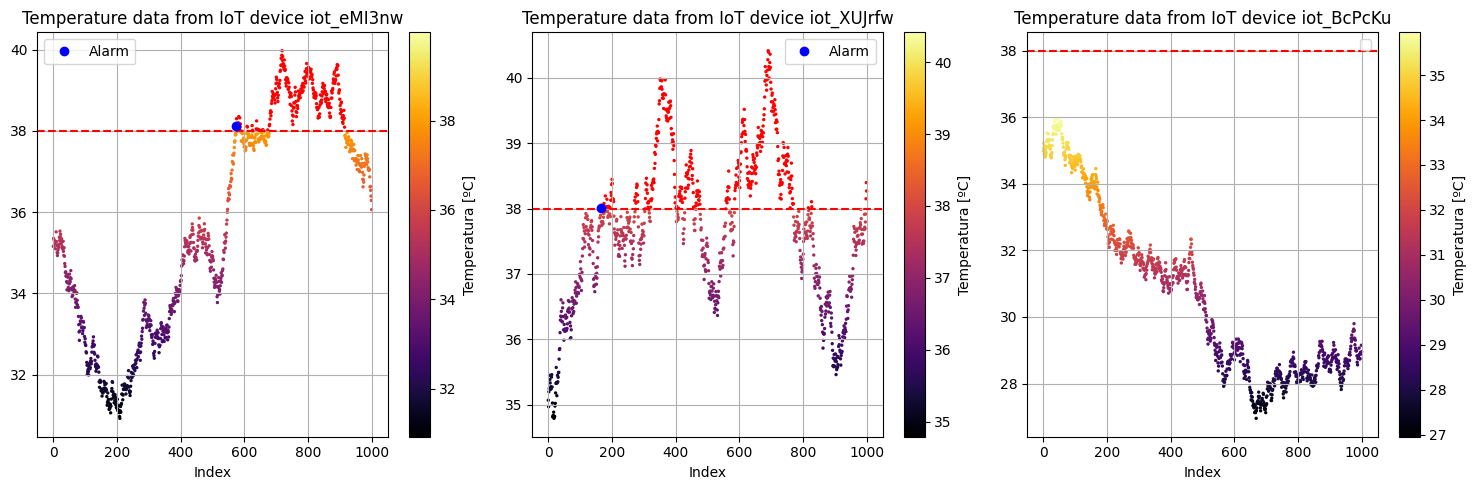

In [5]:
from plots import plot_temperature_data
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, sensor in zip(axs, sensors):
    plot_temperature_data(fig, ax, sensor['data'], sensor['name'])

plt.tight_layout()
plt.show()

`Segura execução no documento até os threads terminarem:`

In [6]:
# for thread in threads:
#     thread.join()

Dados sendo inseridos no banco de dados:
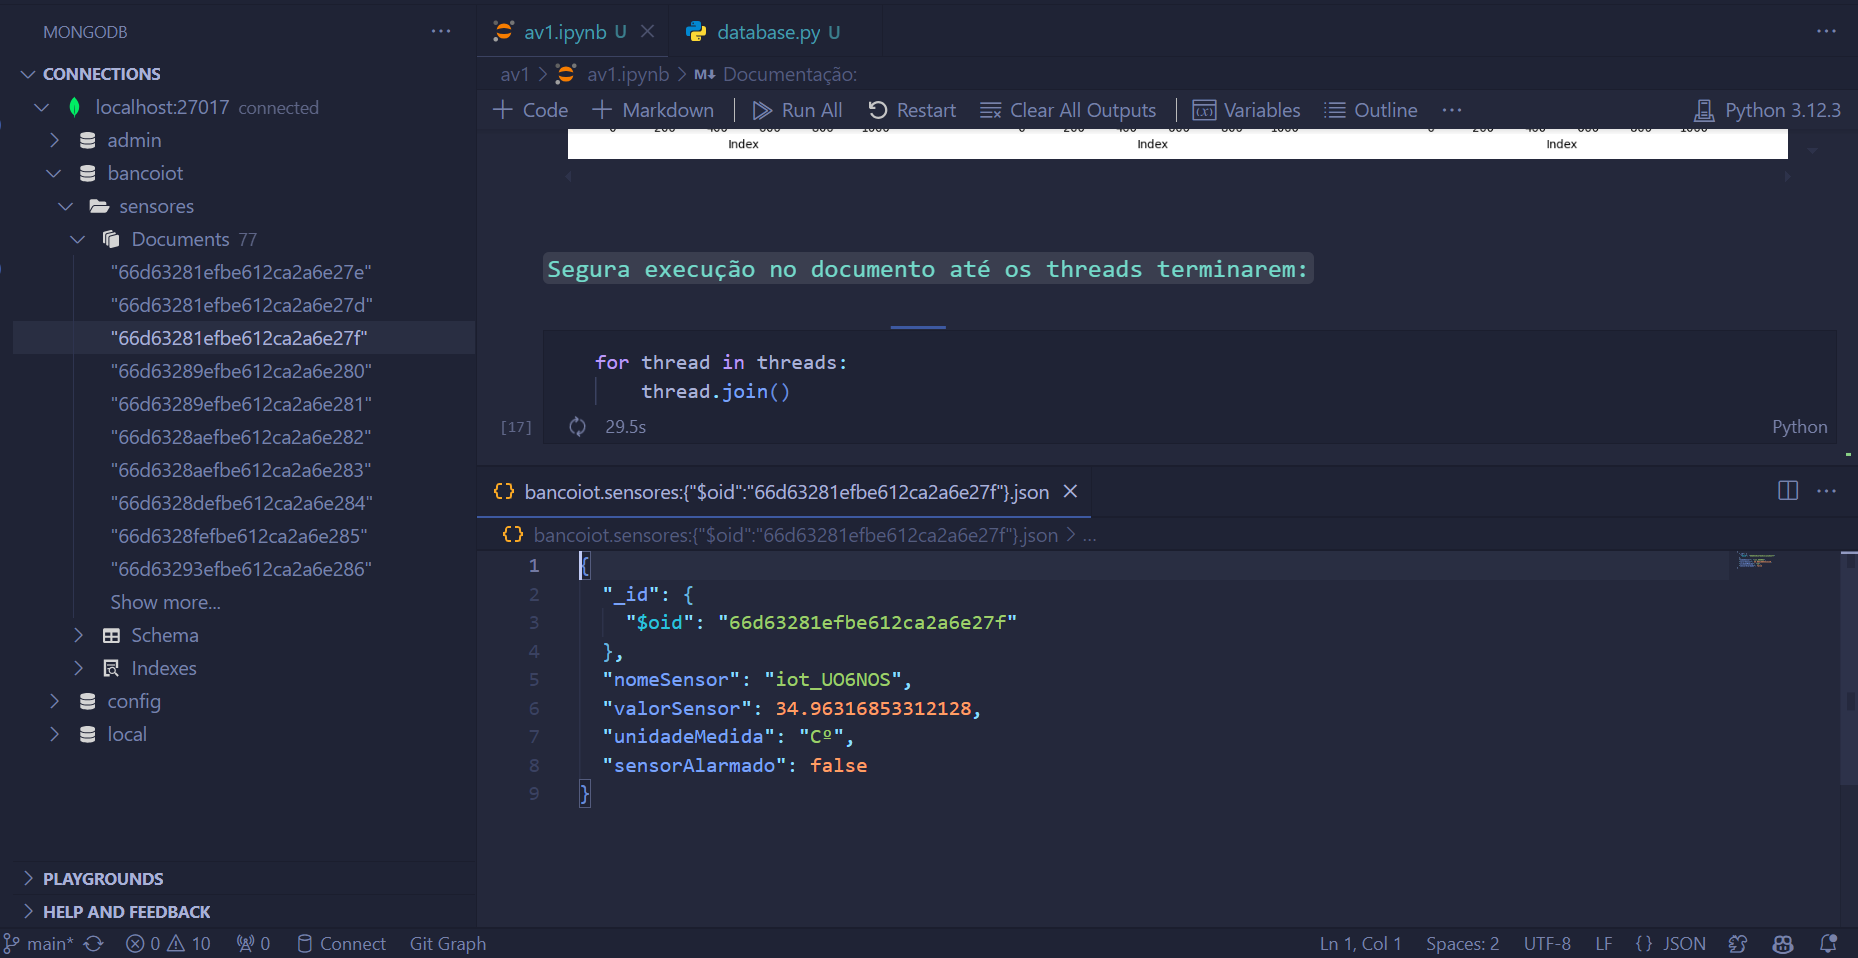